In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

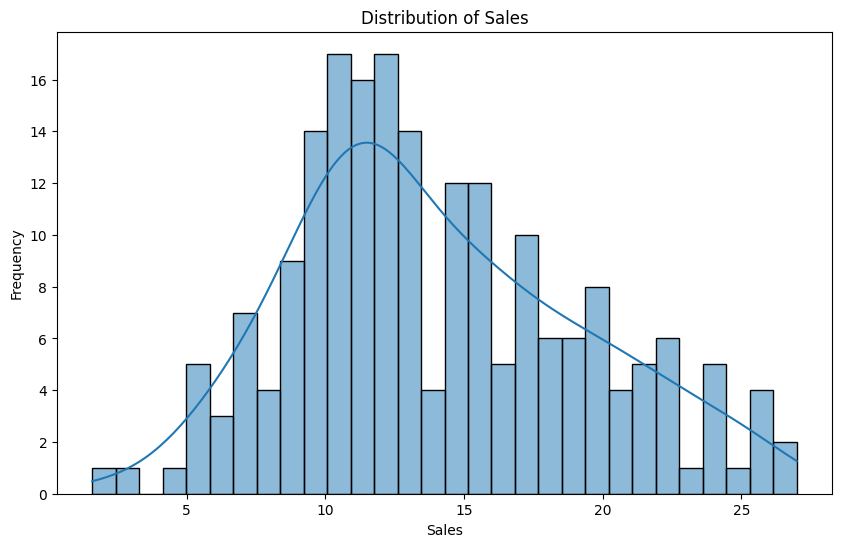

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30,kde =True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

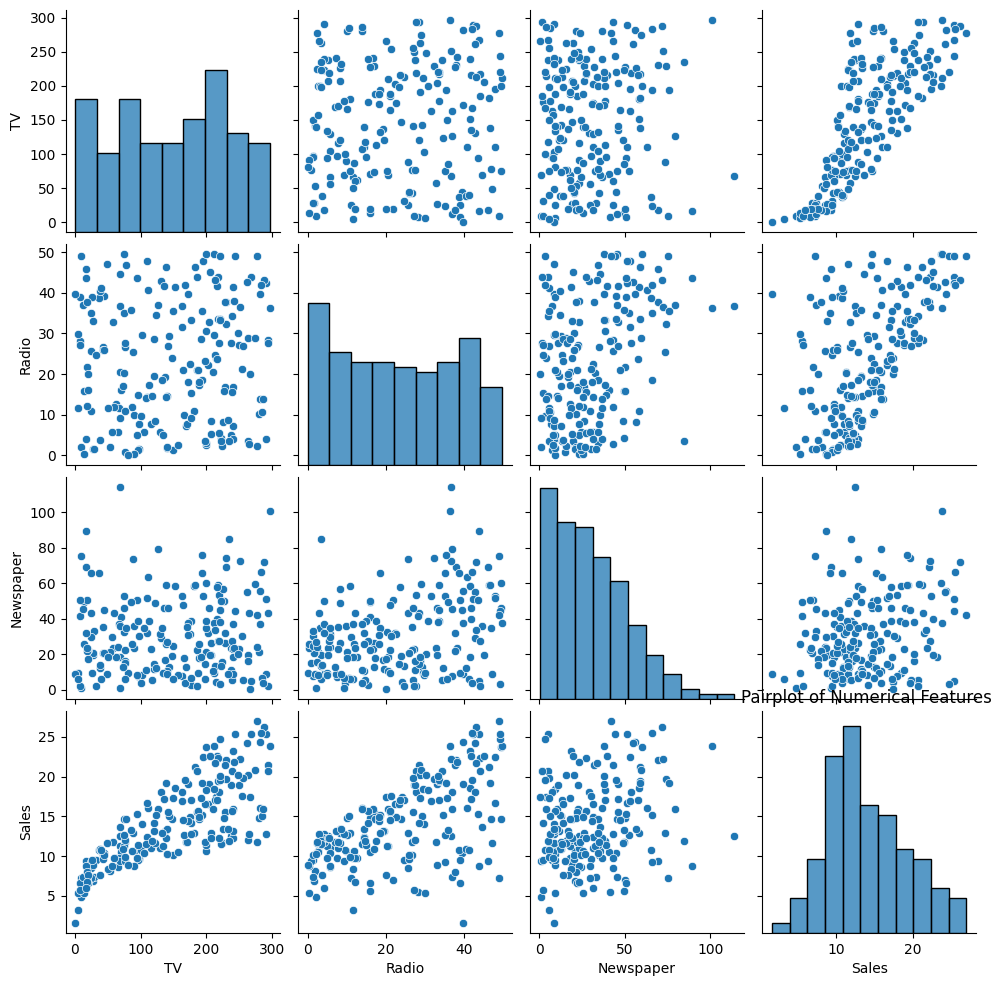

In [ ]:
# Pairplot to visualize relationships between numerical features

sns.pairplot(data, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.title('Pairplot of Numerical Features ')
plt.show()

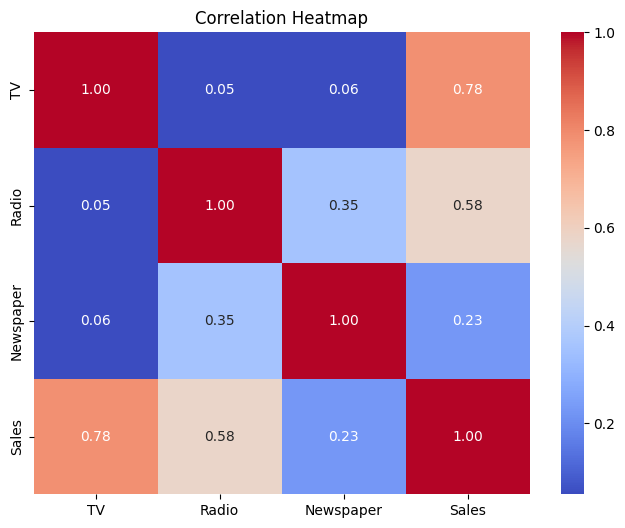

In [ ]:
# Correlation heatmap
corr_matrix = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

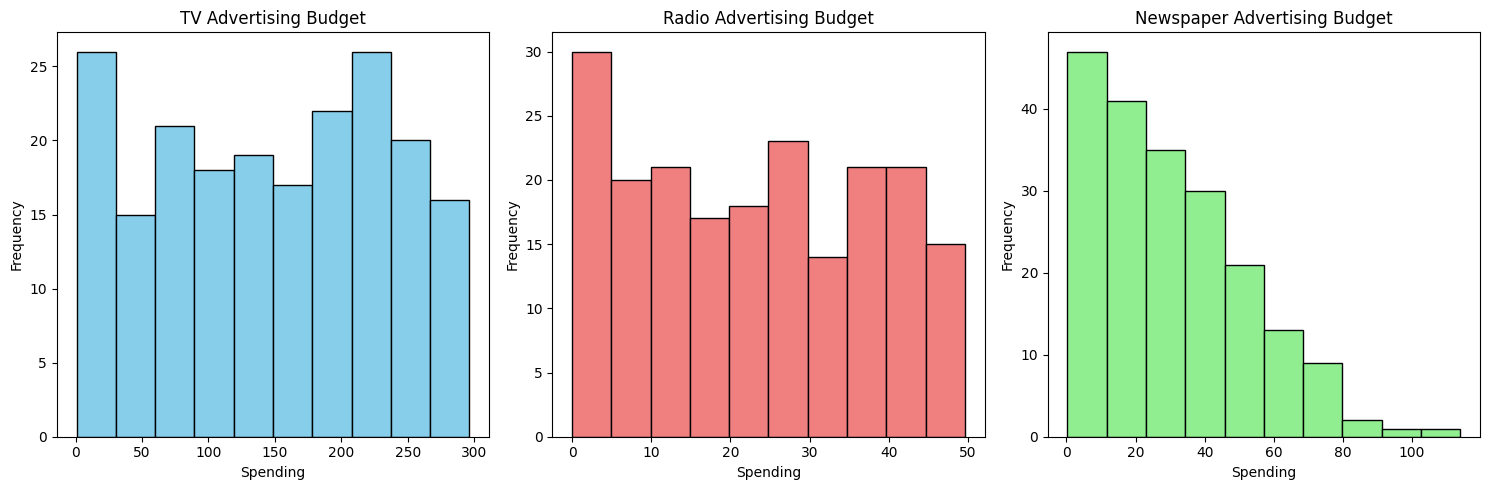

In [ ]:
# Create subplots for each histogram
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for 'TV,' 'Radio,' and 'Newspaper' columns
data["TV"].plot.hist(ax=axes[0], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('TV Advertising Budget')
axes[0].set_xlabel('Spending')
axes[0].set_ylabel('Frequency')

data["Radio"].plot.hist(ax=axes[1], bins=10, color='lightcoral', edgecolor='black')
axes[1].set_title('Radio Advertising Budget')
axes[1].set_xlabel('Spending')
axes[1].set_ylabel('Frequency')

data["Newspaper"].plot.hist(ax=axes[2], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Newspaper Advertising Budget')
axes[2].set_xlabel('Spending')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
y = data['Sales']
X = data.drop('Sales', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
predictions = reg_model.predict(X_test)

In [ ]:
#predictions

In [ ]:
#Testing the model with new data

new_point = pd.DataFrame({'TV':[230.1], 'Radio':[37.8], 'Newspaper':[69.2]})
predicted_sales = reg_model.predict(new_point)

predicted_sales

array([20.78314415])

In [ ]:
y_test.shape

(40,)

In [ ]:
print('MSE is:', mean_squared_error(y_test,predictions))

MSE is: 2.891735838236004


In [ ]:
print('R2 Score is : ', r2_score(y_test,predictions))

R2 Score is :  0.8508891379360347


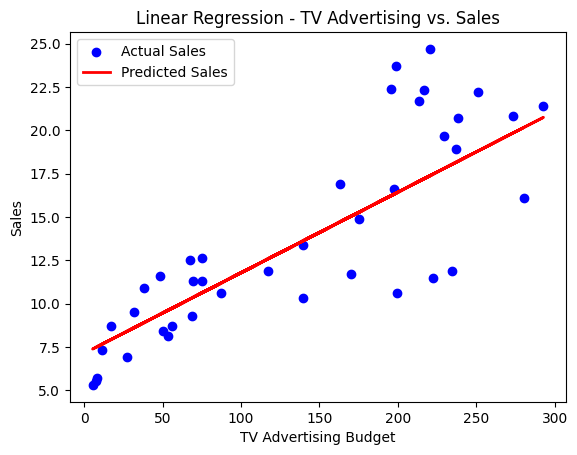

In [ ]:
X = data[['TV']]
y = data['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already trained your linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = regression_model.predict(X_test)

# Plotting the scatter plot with actual and predicted values
# plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted Sales')
plt.title('Linear Regression - TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

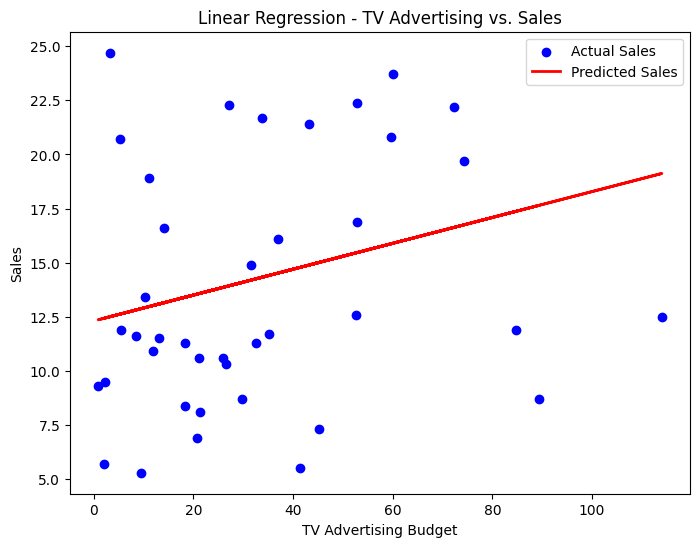

In [ ]:
X = data[['Newspaper']]
y = data['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already trained your linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = regression_model.predict(X_test)

# Plotting the scatter plot with actual and predicted values
# plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted Sales')
plt.title('Linear Regression - TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

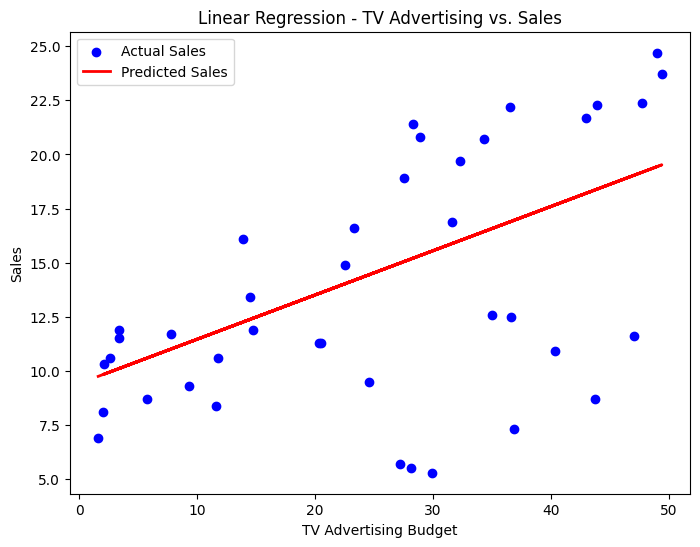

In [ ]:
X = data[['Radio']]
y = data['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already trained your linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = regression_model.predict(X_test)

# Plotting the scatter plot with actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted Sales')
plt.title('Linear Regression - TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already trained your linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = regression_model.predict(X_test)

# Plotting the scatter plot with actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted Sales')
plt.title('Linear Regression - TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()